In [1]:
import numpy as np
import and_logic_generator as and_gen
import and_gate_pipeline as pipeline
import matplotlib.pyplot as plt

# reload modules every 2 seconds
%load_ext autoreload
%autoreload 2

In [2]:
# Repeatable seed
random_state = 2**12
np.random.seed(seed=random_state)


In [3]:
# Prepare samples
n = 2000
x, y = and_gen.generate_uniform_samples(
    n=n, 
    threshold=0, 
    radius=1.0)


In [4]:
and_gate_pipeline = pipeline.LogicGatePipeline(x, y)
and_gate_pipeline.random_state = random_state


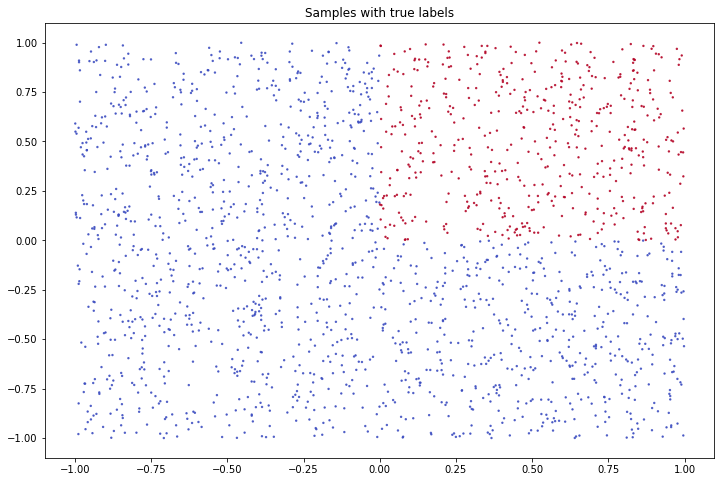

In [5]:
# Parameters for figures
figsize = np.array(plt.rcParams["figure.figsize"]) * 2
x_max = np.amax(x, axis=0) * 1.1
x_min = np.amin(x, axis=0) * 1.1

and_gate_pipeline.plot_data(
    figsize=figsize, xlim=[x_min[0], x_max[0]], ylim=[x_min[1], x_max[1]])


In [6]:
# 80:20 split on training and test sets
and_gate_pipeline.train_test_split(0.2)

Train test split: 0.80:0.20


In [9]:
# Parameters for SVM
gamma='scale'
C=100
shift=[[-0.5, -0.5]]

and_gate_pipeline.fit_svm_model(gamma=gamma, C=C, shift=shift)


With gamma = scale and C = 100
Accuracy on train set = 99.4375%
Accuracy on test set  = 99.5000%
Passed basic test


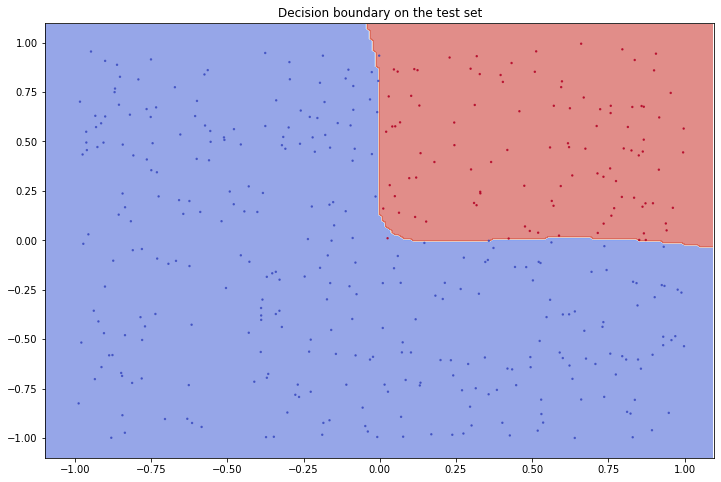

In [10]:
and_gate_pipeline.plot_prediction(
    figsize, h=0.01, 
    mesh_xlim=[x_min[0], x_max[0]], mesh_ylim=[x_min[1], x_max[1]], 
    xlim=[x_min[0], x_max[0]], ylim=[x_min[1], x_max[1]])


In [11]:
and_gate_pipeline.model.get_params()


{'C': 100,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 4096,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [12]:
# Parameter for stepping size of Adversarial Examples
epsilon=0.0006

and_gate_pipeline.generate_adversarial_examples(epsilon=epsilon)


Negative mean = [-0.1441, -0.1646]
Positive mean = [0.5026, 0.5046]
Completed after 1681 epoch...
Misclassified = 201
Misclassified negative = 47 (11.7500%)
Misclassified positive = 154 (38.5000%)
Found 201 Adversarial Examples out of 400. 50.2500% successful rate


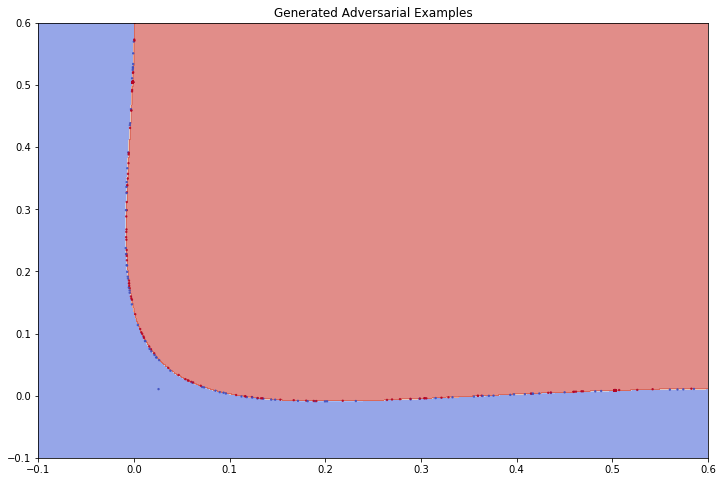

In [13]:
and_gate_pipeline.plot_adversarial_examples(
    figsize, h=0.001,
    mesh_xlim=[-0.1, 0.6], mesh_ylim=[-0.1, 0.6],
    xlim=[-0.1, 0.6], ylim=[-0.1, 0.6])


In [14]:
# Parameters for Applicability Domain
k = 9
zeta0 = 0.3
zeta1 = 0.3

and_gate_pipeline.run_applicability_domain(zeta0=zeta0, zeta1=zeta1, k=k)



---------- Applicability ---------------
Pass rate = 100.0000%

---------- Reliability -----------------

In 0 class:
Threshold = 0.0645
Average mean = 0.0771
Passed indices:
3, 12, 19, 42, 46, 51, 68, 75, 92, 169, 186, 230, 278, 306, 338, 345, 351, 357, 375, 384, 385, 394

In 1 class:
Threshold = 0.0659
Average mean = 0.0770
Passed indices:
0, 4, 7, 9, 11, 15, 16, 17, 18, 20, 22, 27, 29, 31, 32, 38, 39, 40, 44, 48, 53, 54, 55, 56, 57, 65, 73, 80, 83, 84, 85, 88, 90, 94, 97, 100, 104, 105, 107, 108, 112, 115, 116, 118, 119, 125, 128, 133, 136, 138, 139, 148, 151, 155, 162, 173, 183, 187, 188, 189, 192, 193, 196, 198, 199, 201, 203, 204, 206, 209, 211, 221, 227, 228, 235, 240, 242, 247, 248, 249, 252, 253, 254, 258, 259, 261, 263, 264, 267, 274, 276, 282, 285, 286, 289, 292, 295, 307, 308, 310, 311, 312, 313, 314, 317, 320, 321, 322, 325, 328, 330, 331, 336, 337, 339, 343, 347, 350, 353, 360, 361, 363, 364, 369, 370, 372, 373, 377, 380, 383, 386, 388, 390, 395, 396, 399
Distance of c0 

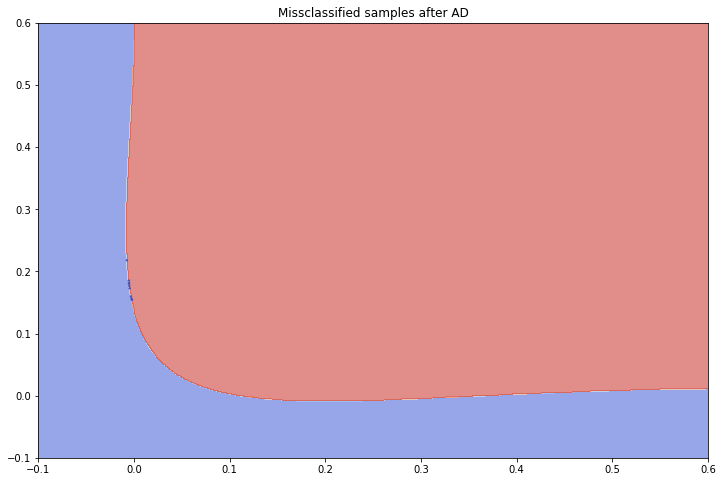

In [15]:
and_gate_pipeline.plot_after_ad(
    figsize, h=0.001,
    mesh_xlim=[-0.1, 0.6], mesh_ylim=[-0.1, 0.6],
    xlim=[-0.1, 0.6], ylim=[-0.1, 0.6])